Multiple Regression
-------

![](https://cdn.meme.am/cache/instances/folder501/500x/65448501.jpg)

A company that makes carseats would like to construct a model to predict sales. 

The data is here: https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv 

It contains 400 observations on the following 11 variables:

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

-----

Load in datasets

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm

carseat_data.carseat_data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv")
#carseat_data.Urban = carseat_data.Urban.replace(['Yes','No'], [1,0])
#carseat_data.US = carseat_data.US.replace(['Yes','No'], [1,0])
carseat_data.describe()
carseat_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


Visualize the data with the appropriate plots. 

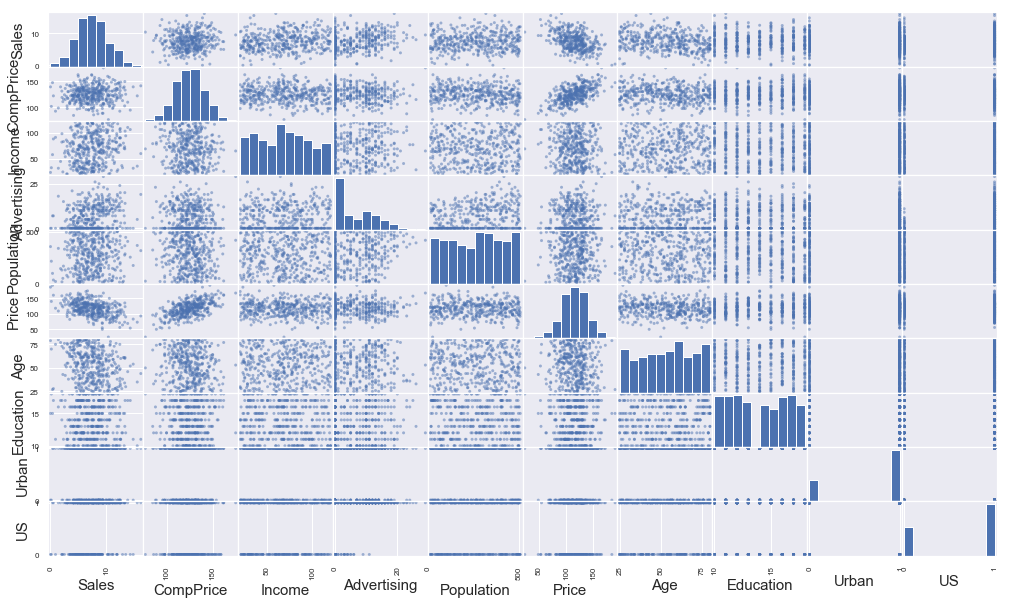

In [25]:
# For example
pd.plotting.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);

In [3]:
#pip install matplotlib==3.1.0


The following command must be run outside of the IPython shell:

    $ pip install matplotlib==3.1.0

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


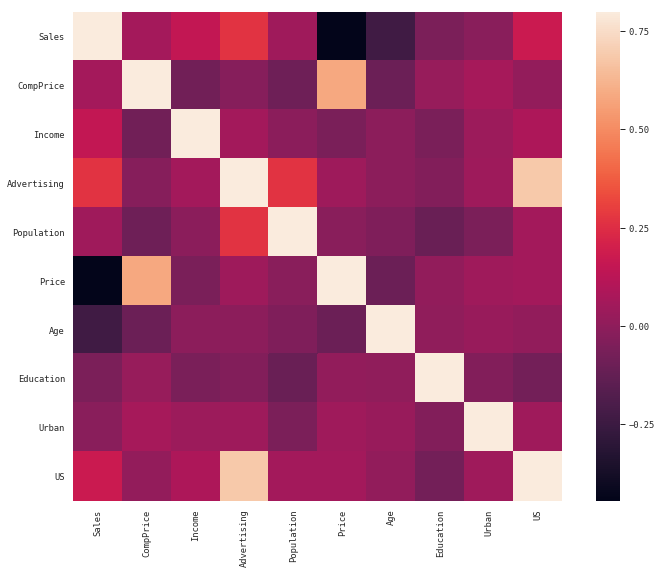

In [26]:
#correlation matrix
#http://seaborn.pydata.org/examples/many_pairwise_correlations.html
#http://seaborn.pydata.org/examples/network_correlations.html
sns.set(context="paper", font="monospace")
corrmat = carseat_data.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# # Drawing the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True);

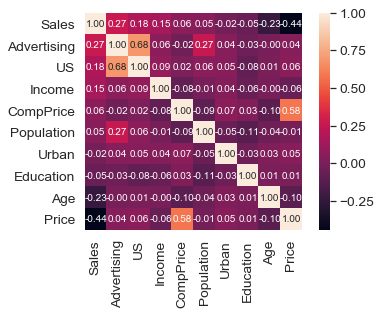

In [27]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(carseat_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

What trends do you see in the data?

In [ ]:
# Sales are positively correlated  with Advertising, Location, Income, CompPrice and population
# Sales are negatively correlated with Education, Urban or Rural,  Age and Price,

Find the single best predictor for a simple linear regression.

<br>

<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [33]:
X2 = carseat_data[['Price']]
X2 = sm.add_constant(X2)
y2 = carseat_data["Sales"]

X2.head(n=2)

sm.OLS(y2, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           7.62e-21
Time:                        16:01:47   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fit a the most possible multiple regression.

In [32]:
X2 = carseat_data[['Advertising', 'Income', 'CompPrice', 'Population', 'Education', 'Age', 'Price','Urban', 'US']]
X2 = sm.add_constant(X2)
y2 = carseat_data["Sales"]

X2.head(n=2)

sm.OLS(y2, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     51.38
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           6.73e-61
Time:                        15:56:34   Log-Likelihood:                -825.98
No. Observations:                 400   AIC:                             1672.
Df Residuals:                     390   BIC:                             1712.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8244      1.130      6.925      0.000       5.603      10.046
Advertising     0.1369      0.021      6.509      0.000       0.096       0.178
Income          0.0131      0.003      3.738      0.000       0.006       0.020
CompPrice       0.0943      0.008     11.986      0.000       0.079       0.110
Population     -0.0002      0.001     -0.286      0.775      -0.002       0.001
Education      -0.0423      0.037     -1.132      0.258      -0.116       0.031
Age            -0.0448      0.006     -7.437      0.000      -0.057      -0.033
Price          -0.0924      0.005    -18.261      0.000      -0.102      -0.082
Urban          -0.1559      0.213     -0.731      0.465      -0.575       0.264
US             -0.1063      0.283     -0.375      0.708      -0.663       0.451
==============================================================================
Omnibus:                        8.489   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.052
Skew:                           0.301   Prob(JB):                       0.0178
Kurtosis:                       2.651   Cond. No.                     4.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How does the $R^2$ compare better best simple and most complex

In [ ]:
# Compared to the R squared of 0.198 of the single variable regresiion the regression which includesd all independenz
# variable offers an r squared of 

Remove a couple of explanatory variables. How does $R^2$ change?

What is the best criteria for removing variables?

Repeated the process for the adjusted $R^2$ 

Write a brief summary of results.

<br>

<details><summary>
Click here for a hint…
</summary>
Don't write every step. Just pick the most useful model.
</details>
   

<br>
<br> 
<br>

----